In [3]:
import os

import pandas as pd
from scipy.stats import zscore
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from matplotlib import pyplot
from itertools import combinations
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# v1 = pd.read_excel("/data/new_dataset_1.xlsx")
# v3 = pd.read_excel("/data/new_dataset_3.xlsx")
# v4 = pd.read_excel("/data/new_dataset_4.xlsx")
# v5 = pd.read_excel("/data/new_dataset_5.xlsx")
# v6 = pd.read_excel("/data/new_dataset_6.xlsx")
#
# vavg = pd.concat([v1, v3, v4, v5, v6]).groupby(level=0).mean()
# vavg.to_excel(r'Averaged_Dataset_and_FIS.xlsx', index = False)

In [5]:
vavg = pd.read_excel('/data/Averaged_Dataset_and_FIS.xlsx', index = False)

TypeError: read_excel() got an unexpected keyword argument 'index'

In [3]:
vavg = vavg.drop(['DELTA30'], axis=1)

In [4]:
df = pd.read_excel('new_df_66.xlsx', engine='openpyxl')
seq_and_y = df.iloc[:, 128:]
vavg = pd.concat([vavg, seq_and_y], axis=1)

In [5]:
X = vavg.drop(['DELTA30'], axis=1)
Y = vavg['DELTA30']

In [6]:
# corr_matrix = df.corr()
# corr_matrix.style.background_gradient(cmap='coolwarm')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [8]:
seed = 7
model = xgb.LGBMRegressor(verbosity=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14349
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 188
[LightGBM] [Info] Start training from score 0.716071
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [9]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
model = xgb.LGBMRegressor(verbosity=0)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
predictions
results = model.evals_result_
# l1 is MAE l2 is MSE

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's l1: 1.09351	training's rmse: 1.39034	training's l2: 1.93304	valid_1's l1: 1.24148	valid_1's rmse: 1.59242	valid_1's l2: 2.53581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's l1: 1.0251	training's rmse: 1.31097	training's l2: 1.71864	valid_1's l1: 1.18799	valid_1's rmse: 1.52648	valid_1's l2: 2.33015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's l1: 0.966357	training's rmse: 1.24772	training's l2: 1.5568	valid_1's l1: 1.13909	valid_1's rmse: 1.46871	valid_1's l2: 2.15711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's l1: 0.908298	training's rmse: 1.18524	training's l2: 1.4048	valid_1's l1: 1.10104	valid_1's 

C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


No handles with labels found to put in legend.


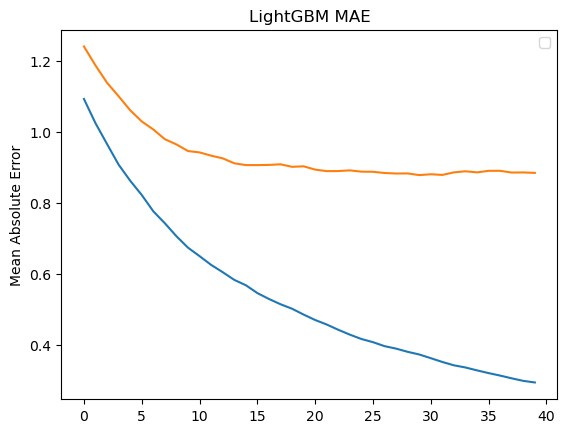

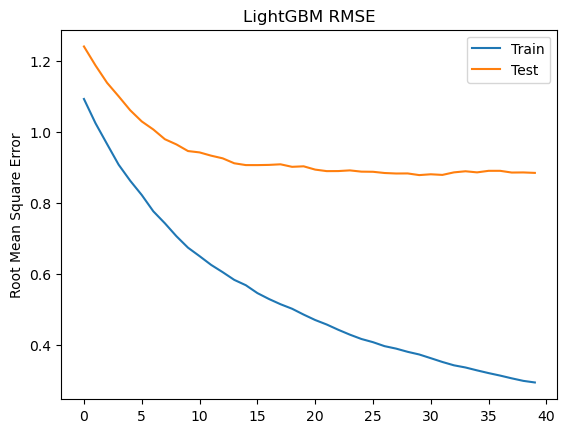

In [10]:
epoch = len(results['valid_1']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'])
ax.plot(x_axis, results['valid_1']['l1'])
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
#pyplot.savefig('LightGBM_MAE_raw.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
#pyplot.savefig('LightGBM_RMSE_raw.png')
pyplot.show()

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error



parameters = {'learning_rate': [0.001,0.004,0.008,0.01,0.02,0.03,0.04,0.05,0.06,0.07,
                                0.08,0.09,0.1,0.2,0.4,0.6,0.8,1],
              'max_depth': range(1,100,10),
              'num_leaves': range(1,100,10),
              'colsample_bytree': [0.1,0.2,0.4,0.8,1],
              'min_split_gain': range(0,20,1),
              'n_estimators': range(10,1000,10),
              "reg_alpha"   : [0.1,0.2,0.4,0.6,0.8,1],
              "reg_lambda"  : range(1,10,1)
          }

xgb_model = LGBMRegressor(random_state=7)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, y_train, verbose=1)

y_pred_train = grid_obj_xgb.predict(X_train)
y_pred_test = grid_obj_xgb.predict(X_test)

err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done  68 out of  75 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    1.7s finished


In [12]:
print('\n All results:')
print(grid_obj_xgb.cv_results_)
print('\n Best estimator:')
print(grid_obj_xgb.best_estimator_)
print('\n Best hyperparameters:')
print(grid_obj_xgb.best_params_)
results = pd.DataFrame(grid_obj_xgb.cv_results_)#


 All results:
{'mean_fit_time': array([0.00578475, 0.17694597, 0.14722395, 0.12686806, 0.05605001,
       0.14461179, 0.09294314, 0.10192671, 0.02234015, 0.20046239,
       0.00339127, 0.05764546, 0.08058457, 0.07619586, 0.0773921 ]), 'std_fit_time': array([0.00074591, 0.00381635, 0.01138149, 0.00420443, 0.00277812,
       0.0157446 , 0.01157877, 0.01527455, 0.00241029, 0.00738247,
       0.00048871, 0.00443408, 0.00971926, 0.00774059, 0.01158958]), 'mean_score_time': array([0.        , 0.00319099, 0.00279307, 0.00279217, 0.00239348,
       0.00299258, 0.00378971, 0.003192  , 0.00279274, 0.00259371,
       0.        , 0.00259266, 0.00239353, 0.00219407, 0.0021944 ]), 'std_score_time': array([0.00000000e+00, 9.76698289e-04, 3.98874582e-04, 3.98898135e-04,
       4.89201368e-04, 5.91739352e-07, 1.59571171e-03, 9.76736903e-04,
       3.99184608e-04, 4.88383112e-04, 0.00000000e+00, 4.88305897e-04,
       4.88577749e-04, 3.99279804e-04, 7.46544073e-04]), 'param_reg_lambda': masked_array(da

In [13]:
Best_estimator = LGBMRegressor(colsample_bytree=1, learning_rate=0.05, max_depth=21,
              min_split_gain=6, n_estimators=210, num_leaves=11, random_state=7,
              reg_alpha=1, reg_lambda=8)


C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's l1: 1.13791	training's rmse: 1.44237	training's l2: 2.08043	valid_1's l1: 1.28742	valid_1's rmse: 1.63894	valid_1's l2: 2.68611
[2]	training's l1: 1.10925	training's rmse: 1.40948	training's l2: 1.98663	valid_1's l1: 1.25739	valid_1's rmse: 1.60752	valid_1's l2: 2.58412
[3]	training's l1: 1.08213	training's rmse: 1.37868	training's l2: 1.90077	valid_1's l1: 1.22931	valid_1's rmse: 1.57849	valid_1's l2: 2.49164
[4]	training's l1: 1.05624	training's rmse: 1.34988	training's l2: 1.82218	valid_1's l1: 1.20473	valid_1's rmse: 1.55172	valid_1's l2: 2.40782
[5]	training's l1: 1.03166	training's rmse: 1.32296	training's l2: 1.75023	valid_1's l1: 1.18579	valid_1's rmse: 1.52797	valid_1's l2: 2.33468
[6]	training's l1: 1.01025	training's rmse: 1.2993	training's l2: 1.68819	valid_1's l1: 1.16774	valid_1's rmse: 1.50583	valid_1's l2: 2.26754
[7]	training's l1: 0.987717	training's rmse: 1.27556	training's l2: 1.62706	valid_1's l1: 1.1503	valid_1's rmse: 1.48477	valid_1's l2: 2.20453


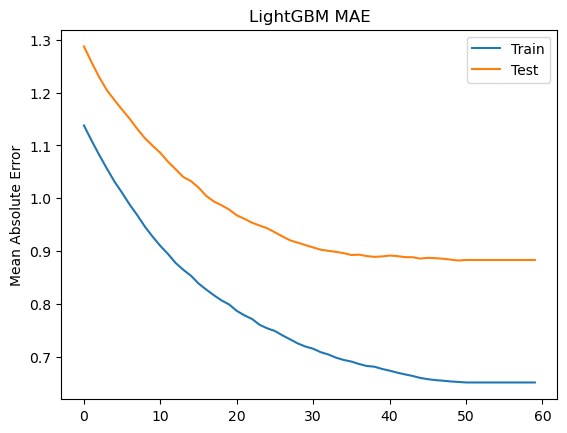

In [14]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
Best_estimator.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = Best_estimator.predict(X_test)
predictions = [value for value in y_pred]
predictions
results = Best_estimator.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()

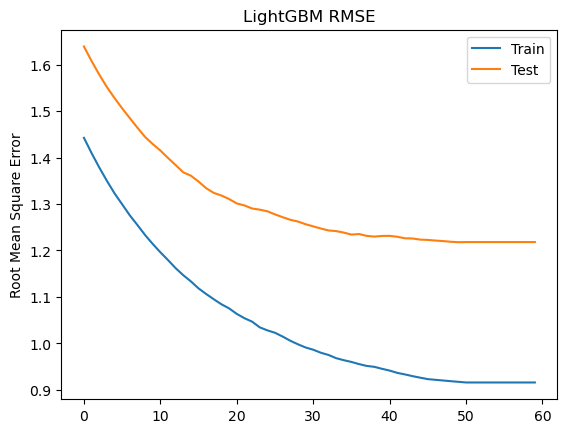

In [15]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

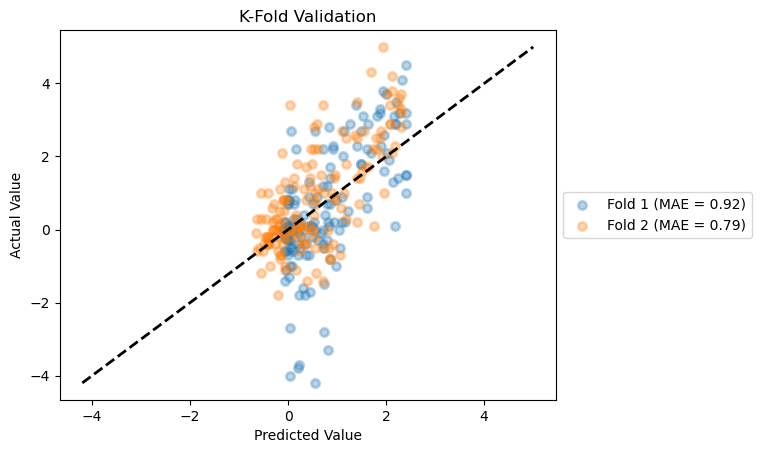

Average of CV: 0.8536810295002291
All Scores of CV [0.9153510603861986, 0.7920109986142594]


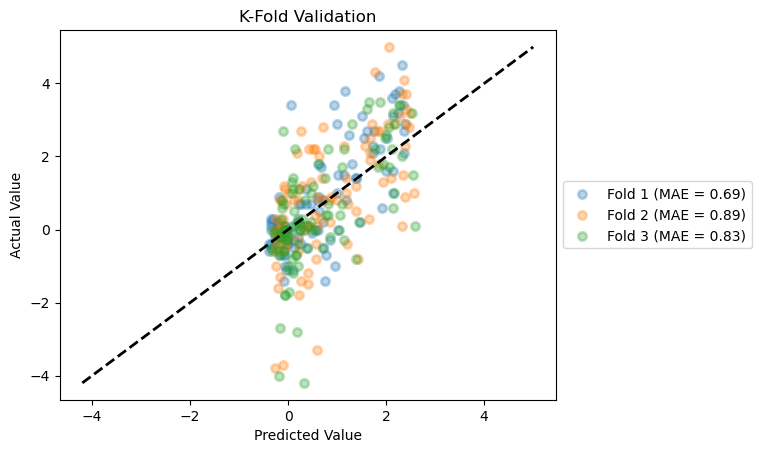

Average of CV: 0.8041360463499053
All Scores of CV [0.6909712627027396, 0.8945472466131872, 0.8268896297337892]


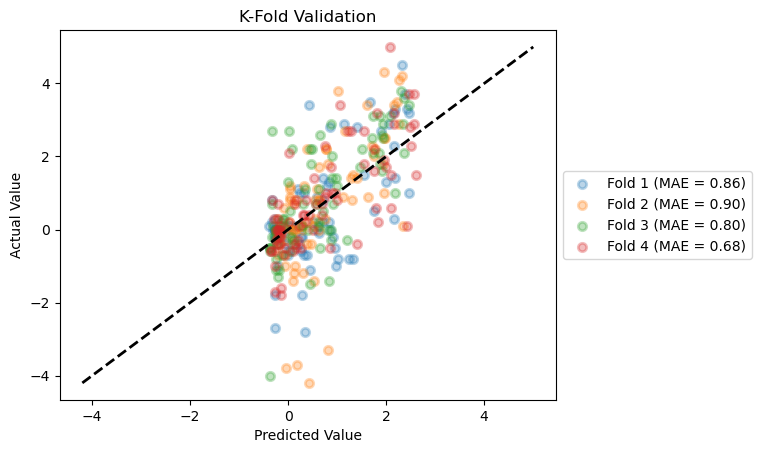

Average of CV: 0.8092534492421029
All Scores of CV [0.8560828648343309, 0.9012127797274693, 0.800138914731354, 0.679579237675257]


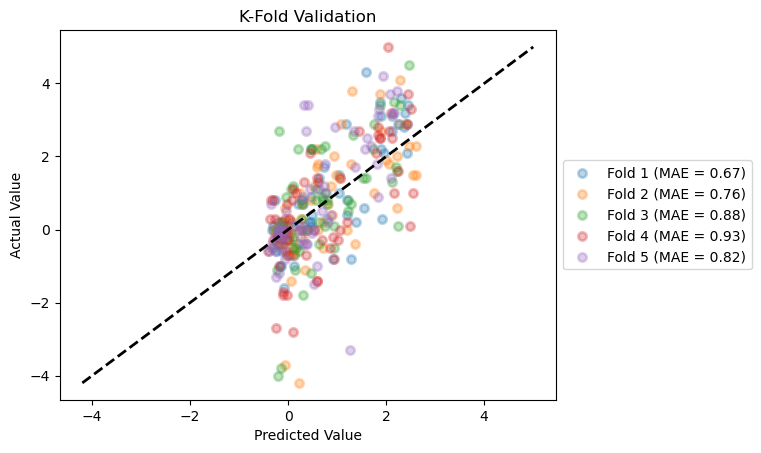

Average of CV: 0.8152019921423401
All Scores of CV [0.6745021906497922, 0.7636777133677316, 0.8819065093096898, 0.9341559817223937, 0.8217675656620933]


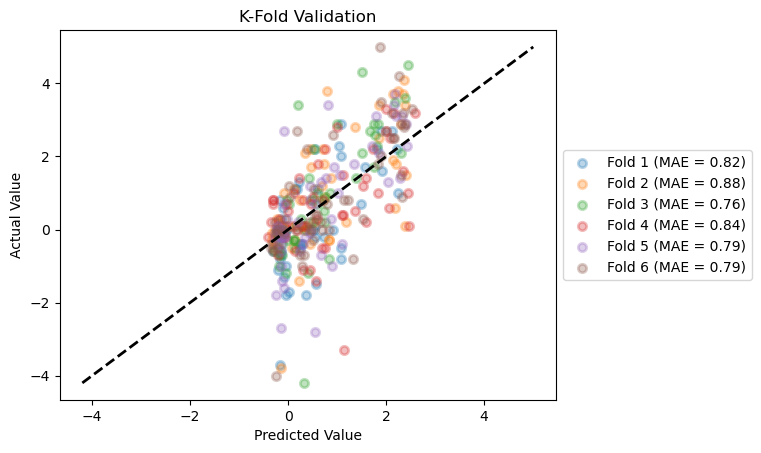

Average of CV: 0.8129564958694613
All Scores of CV [0.8215910829156735, 0.8762732732928321, 0.7559623696457461, 0.8440384446918803, 0.7859788168016701, 0.7938949878689658]


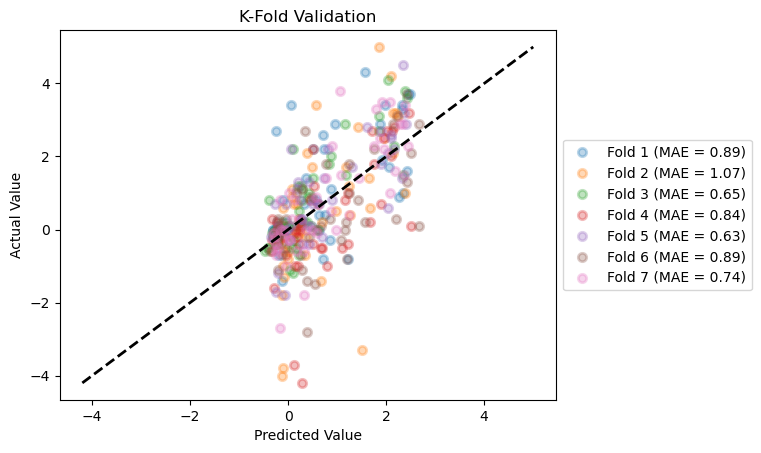

Average of CV: 0.8165216696269715
All Scores of CV [0.8939120484811606, 1.073688653903944, 0.650777021781428, 0.8369640904794194, 0.6333653518959358, 0.8857886990960062, 0.7411558217509054]


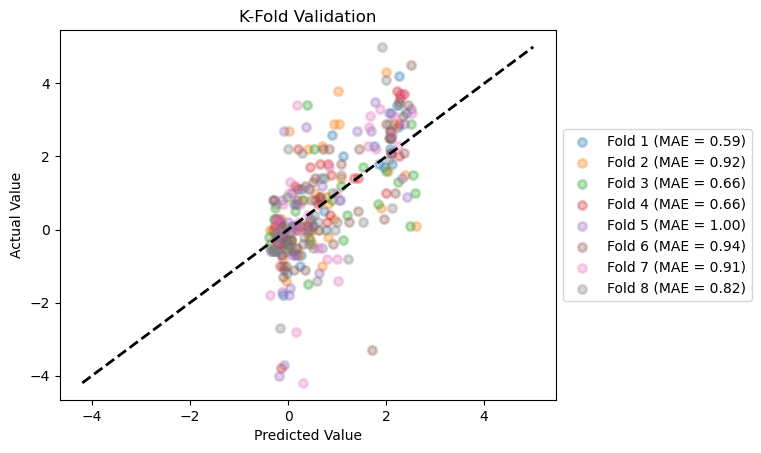

Average of CV: 0.8143040770551908
All Scores of CV [0.5916765963125837, 0.9194443867343992, 0.6648477974400543, 0.6646311055264338, 1.0047210588645028, 0.9400770311227811, 0.9080303503965539, 0.821004290044218]


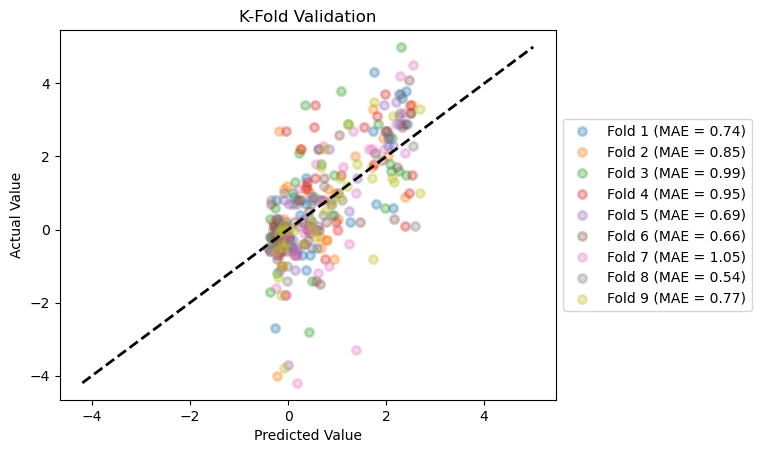

Average of CV: 0.8060407328843038
All Scores of CV [0.7448142585389783, 0.8528795216906636, 0.9869735262036382, 0.9514612557761308, 0.6910779730215971, 0.6642515747351239, 1.0498886838739592, 0.5401919552909966, 0.7728278468276458]


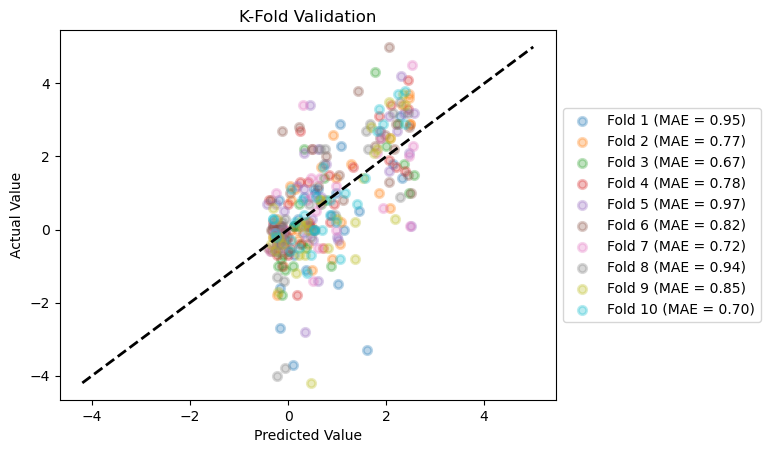

Average of CV: 0.8145516352394185
All Scores of CV [0.9491868557381691, 0.770593298878246, 0.6675204718179775, 0.7801764361771611, 0.9675699351780314, 0.8169129571496261, 0.7159357921488047, 0.9350474266469159, 0.8465061407386452, 0.6960670379206078]


In [16]:
n_fold = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for fold in n_fold:
    scores = []
    cv = KFold(n_splits=fold, shuffle=True)
    fig = plt.figure()
    i = 1
    for train, test in cv.split(X, Y):
        prediction = Best_estimator.fit(X.iloc[train],
                     Y.iloc[train]).predict(X.iloc[test])
        true = Y.iloc[test]
        score = mean_absolute_error(true, prediction)
        scores.append(score)
        plt.scatter(prediction, true, lw=2, alpha=0.3,
                    label='Fold %d (MAE = %0.2f)' % (i,score))
        i = i+1
    plt.plot([min(Y),max(Y)], [min(Y),max(Y)],
             linestyle='--', lw=2, color='black')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('K-Fold Validation')
    plt.legend(prop={"size":10}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    print("Average of CV:", mean(scores))
    print("All Scores of CV", scores)

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Best_estimator, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [18]:
# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = Best_estimator.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

In [19]:
# this might be the best one
eli5.show_weights(Best_estimator, importance_type="weight")  #"weight" - how often a feature has been used in making splits

In [20]:
eli5.show_weights(Best_estimator, importance_type="split")

In [21]:
eli5.show_weights(Best_estimator, importance_type="gain") #"gain" - that is the average gain of the feature when it is used in trees.

In [22]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.47
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 9.1
Mean Absolute Error (Σ|y-pred|/n): 0.88
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.22


In [23]:
######## COMPARING DATASET ORIGIN #################

In [24]:
MDPocket = X.iloc[:, :80]
MD = X.iloc[:, 80:126]
Seq = X.iloc[:, 126:]
Seq_MD = X.iloc[:, 80:]
MD_MDpocket = X.iloc[:, :126]
Seq_MDpocket = pd.concat([MDPocket, Seq], axis =1)
datasets = [MDPocket, MD, Seq, Seq_MD, MD_MDpocket, Seq_MDpocket]
parameters = {'learning_rate': [0.001,0.004,0.008,0.01,0.02,0.03,0.04,0.05,0.06,0.07,
                                0.08,0.09,0.1,0.2,0.4,0.6,0.8,1],
              'max_depth': range(1,100,10),
              'num_leaves': range(1,100,10),
              'colsample_bytree': [0.1,0.2,0.4,0.8,1],
              'min_split_gain': range(0,20,1),
              'n_estimators': range(10,1000,10),
              "reg_alpha"   : [0.1,0.2,0.4,0.6,0.8,1],
              "reg_lambda"  : range(1,10,1)
          }
for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.2, random_state=7)
    xgb_model = LGBMRegressor(random_state=7)

    grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
    grid_obj_xgb.fit(X_train, y_train,verbose = 1)

    y_pred_train = grid_obj_xgb.predict(X_train)
    y_pred_test = grid_obj_xgb.predict(X_test)

    err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')



    print('\n All results:')
    print(grid_obj_xgb.cv_results_)
    print('\n Best estimator:')
    print(grid_obj_xgb.best_estimator_)
    print('\n Best hyperparameters:')
    print(grid_obj_xgb.best_params_)
    results = pd.DataFrame(grid_obj_xgb.cv_results_)#

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  36 out of  75 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  52 out of  75 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.5s finished
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  36 out of  75 | elapsed:    0.0s remaining:    0.1s



 All results:
{'mean_fit_time': array([0.04547987, 0.02453465, 0.01755261, 0.04208651, 0.02632937,
       0.00339084, 0.05724669, 0.08018556, 0.00279255, 0.0027925 ,
       0.02692809, 0.01994629, 0.21342521, 0.02373672, 0.02812443]), 'std_fit_time': array([0.00312834, 0.0007982 , 0.00249101, 0.00074568, 0.00828698,
       0.00184939, 0.01020193, 0.0072636 , 0.00039885, 0.00039895,
       0.00321609, 0.00109232, 0.0228581 , 0.00263018, 0.00490194]), 'mean_score_time': array([0.00379043, 0.00239396, 0.00199475, 0.00319138, 0.00259323,
       0.        , 0.00219431, 0.00179548, 0.        , 0.        ,
       0.00199466, 0.00239387, 0.00279927, 0.0019948 , 0.0019948 ]), 'std_score_time': array([3.99136896e-04, 4.88519517e-04, 6.50319180e-07, 2.39365102e-03,
       7.98142057e-04, 0.00000000e+00, 3.98922052e-04, 7.45894152e-04,
       0.00000000e+00, 0.00000000e+00, 3.81469727e-07, 4.88597229e-04,
       7.57172034e-04, 2.78041453e-07, 9.53674316e-08]), 'param_reg_lambda': masked_array(da

[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.1s finished
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.



 All results:
{'mean_fit_time': array([0.04328489, 0.03490634, 0.01835103, 0.03111725, 0.01456103,
       0.00299182, 0.01655521, 0.00279264, 0.00279274, 0.01336288,
       0.01675477, 0.04268603, 0.03450775, 0.02154078, 0.00219417]), 'std_fit_time': array([3.96945590e-03, 1.54483347e-03, 4.39709927e-03, 5.06170912e-03,
       2.41021876e-03, 7.00804637e-07, 1.01558754e-03, 3.99375940e-04,
       3.99306369e-04, 4.88520146e-04, 1.16309658e-03, 6.86323544e-03,
       1.84922166e-03, 1.73915105e-03, 3.98635921e-04]), 'mean_score_time': array([0.00179505, 0.00179567, 0.00199471, 0.00199428, 0.00199513,
       0.        , 0.00179529, 0.        , 0.        , 0.00179515,
       0.00199432, 0.00199485, 0.00159616, 0.00179605, 0.        ]), 'std_score_time': array([3.98994016e-04, 3.99065659e-04, 4.15696997e-07, 6.30524942e-04,
       9.46494734e-07, 0.00000000e+00, 3.99115464e-04, 0.00000000e+00,
       0.00000000e+00, 3.98683733e-04, 4.62310777e-07, 6.30675630e-04,
       4.88091815e-04, 3.

[Parallel(n_jobs=12)]: Done  36 out of  75 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  52 out of  75 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  68 out of  75 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.3s finished
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.



 All results:
{'mean_fit_time': array([0.02134337, 0.02097082, 0.0797863 , 0.02313833, 0.01376305,
       0.04807153, 0.00319166, 0.01934762, 0.09115629, 0.03291197,
       0.07320461, 0.03271275, 0.0167552 , 0.05245972, 0.103722  ]), 'std_fit_time': array([0.00135303, 0.00067477, 0.01424437, 0.00572583, 0.00443363,
       0.02349497, 0.0003983 , 0.00435218, 0.03184367, 0.00608266,
       0.01037576, 0.00582889, 0.00517841, 0.01950927, 0.01569306]), 'mean_score_time': array([0.00159597, 0.00196776, 0.00199461, 0.00159569, 0.00199471,
       0.00199451, 0.        , 0.00179524, 0.00199494, 0.00199485,
       0.00698113, 0.00957389, 0.0017952 , 0.00259328, 0.00239387]), 'std_score_time': array([4.88713914e-04, 5.48840605e-05, 1.50789149e-07, 4.88480475e-04,
       1.09271054e-03, 1.90734863e-07, 0.00000000e+00, 3.99208183e-04,
       4.67203091e-07, 6.30977227e-04, 9.99352742e-03, 1.37271042e-02,
       3.99184409e-04, 4.88714053e-04, 4.88402763e-04]), 'param_reg_lambda': masked_array(da

[Parallel(n_jobs=12)]: Done  52 out of  75 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.3s finished
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



 All results:
{'mean_fit_time': array([0.23756461, 0.04009271, 0.08616934, 0.00299206, 0.22041006,
       0.02373543, 0.04647584, 0.00259285, 0.0029923 , 0.07220674,
       0.01236653, 0.01775279, 0.003192  , 0.00418897, 0.02533088]), 'std_fit_time': array([1.58246571e-02, 1.15176132e-02, 7.20789941e-03, 1.31972814e-06,
       1.66173332e-02, 9.76532588e-04, 1.01705548e-03, 4.88461018e-04,
       2.86102295e-07, 6.39005642e-03, 4.88617249e-04, 2.98561232e-03,
       3.98732173e-04, 2.39386564e-03, 1.84992052e-03]), 'mean_score_time': array([0.00438871, 0.00259371, 0.00219474, 0.        , 0.00378966,
       0.00239434, 0.0019948 , 0.        , 0.        , 0.00239415,
       0.00239353, 0.00279241, 0.        , 0.        , 0.00159631]), 'std_score_time': array([4.88499866e-04, 7.98082359e-04, 3.98827540e-04, 0.00000000e+00,
       1.59537795e-03, 4.88305501e-04, 5.91739352e-07, 0.00000000e+00,
       0.00000000e+00, 1.35217050e-03, 4.88869850e-04, 3.99136896e-04,
       0.00000000e+00, 0.

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  36 out of  75 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  52 out of  75 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  68 out of  75 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.4s finished
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.



 All results:
{'mean_fit_time': array([0.02952142, 0.03470783, 0.03889647, 0.04128947, 0.14979897,
       0.01436129, 0.17193937, 0.02872295, 0.0169548 , 0.05166249,
       0.05924172, 0.02373605, 0.06003933, 0.04627609, 0.09694085]), 'std_fit_time': array([0.00195431, 0.0017161 , 0.00063083, 0.00401931, 0.00635127,
       0.00185006, 0.009132  , 0.00116319, 0.00109245, 0.00097749,
       0.00518627, 0.0022214 , 0.00525416, 0.00249108, 0.00255454]), 'mean_score_time': array([0.00219417, 0.0021945 , 0.00279245, 0.00259275, 0.00219445,
       0.00239372, 0.00299253, 0.00239353, 0.00199418, 0.00279222,
       0.00239358, 0.00239372, 0.00239358, 0.00219407, 0.00379   ]), 'std_score_time': array([3.98874354e-04, 3.99065060e-04, 3.99398918e-04, 4.88577935e-04,
       3.98492856e-04, 4.88519354e-04, 4.42200589e-07, 4.88577749e-04,
       4.10190833e-07, 3.98564406e-04, 4.88636248e-04, 4.88811397e-04,
       4.88733724e-04, 3.98683933e-04, 3.99041528e-04]), 'param_reg_lambda': masked_array(da

[Parallel(n_jobs=12)]: Done  36 out of  75 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  52 out of  75 | elapsed:    0.3s remaining:    0.1s



 All results:
{'mean_fit_time': array([0.02672901, 0.03051858, 0.13224683, 0.09275208, 0.15199332,
       0.01855059, 0.03590364, 0.1573781 , 0.02134199, 0.02652941,
       0.07300501, 0.05664816, 0.08018498, 0.02553158, 0.07021108]), 'std_fit_time': array([0.00182799, 0.00119708, 0.00988547, 0.0032772 , 0.01118807,
       0.00079808, 0.00356865, 0.02491577, 0.00135238, 0.00425917,
       0.01168833, 0.00609568, 0.00888904, 0.00232605, 0.01073377]), 'mean_score_time': array([0.00239372, 0.00239339, 0.00259356, 0.00239329, 0.00339146,
       0.00259342, 0.00199437, 0.0025938 , 0.00199451, 0.00219393,
       0.00219378, 0.00398893, 0.00259328, 0.00239382, 0.00239391]), 'std_score_time': array([4.88519238e-04, 4.88792037e-04, 4.88655996e-04, 4.88188514e-04,
       7.98726158e-04, 4.89026080e-04, 8.92080638e-07, 4.88266498e-04,
       7.62939453e-07, 3.98993788e-04, 3.98827141e-04, 3.02486554e-03,
       4.88908628e-04, 4.88733421e-04, 4.88266172e-04]), 'param_reg_lambda': masked_array(da

[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.4s finished
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [25]:
# MDPocket
BestMDPocket = LGBMRegressor(colsample_bytree=0.1, learning_rate=0.02, max_depth=11,
              min_split_gain=6, n_estimators=410, num_leaves=61, random_state=7,
              reg_alpha=0.1, reg_lambda=4)
X_train, X_test, y_train, y_test = train_test_split(MDPocket, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestMDPocket.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestMDPocket.predict(X_test)
predictions = [value for value in y_pred]
results = BestMDPocket.evals_result_

[1]	training's l1: 1.16344	training's rmse: 1.47265	training's l2: 2.1687	valid_1's l1: 1.31377	valid_1's rmse: 1.66729	valid_1's l2: 2.77985
[2]	training's l1: 1.15925	training's rmse: 1.46781	training's l2: 2.15447	valid_1's l1: 1.31009	valid_1's rmse: 1.66424	valid_1's l2: 2.7697
[3]	training's l1: 1.15526	training's rmse: 1.46281	training's l2: 2.13981	valid_1's l1: 1.30808	valid_1's rmse: 1.66196	valid_1's l2: 2.76211
[4]	training's l1: 1.15025	training's rmse: 1.45702	training's l2: 2.12291	valid_1's l1: 1.30343	valid_1's rmse: 1.65722	valid_1's l2: 2.74637
[5]	training's l1: 1.14561	training's rmse: 1.45127	training's l2: 2.10618	valid_1's l1: 1.30074	valid_1's rmse: 1.65389	valid_1's l2: 2.73535
[6]	training's l1: 1.14224	training's rmse: 1.44686	training's l2: 2.09341	valid_1's l1: 1.29688	valid_1's rmse: 1.65044	valid_1's l2: 2.72394
[7]	training's l1: 1.13965	training's rmse: 1.4436	training's l2: 2.08398	valid_1's l1: 1.29533	valid_1's rmse: 1.64769	valid_1's l2: 2.71489
[8

C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


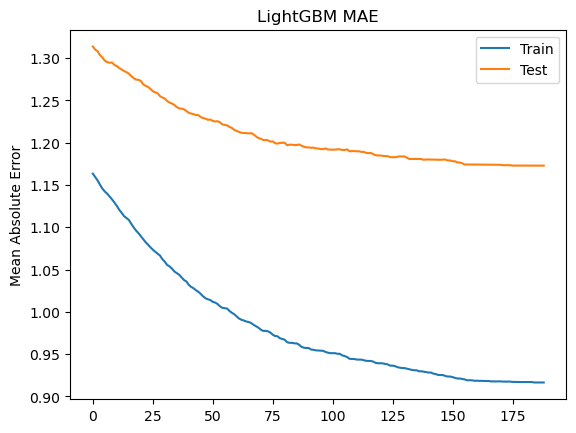

In [26]:
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()

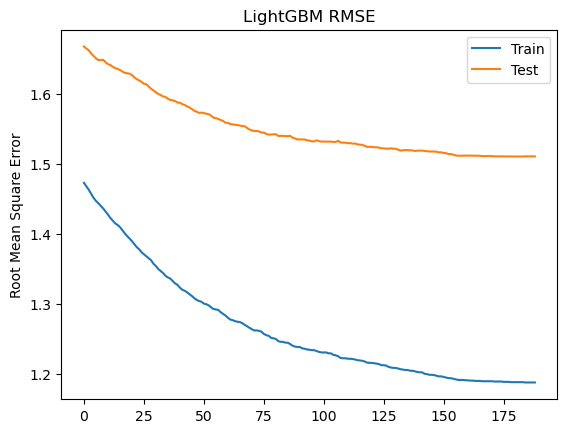

In [27]:
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

In [28]:
perm = PermutationImportance(BestMDPocket, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [29]:
# this might be the best one
eli5.show_weights(BestMDPocket, importance_type="split")  #"weight" - how often a feature has been used in making splits

In [30]:
eli5.show_weights(BestMDPocket, importance_type="gain")

In [31]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.18
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 2.86
Mean Absolute Error (Σ|y-pred|/n): 1.17
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.51


[1]	training's l1: 1.11031	training's rmse: 1.41512	training's l2: 2.00256	valid_1's l1: 1.24662	valid_1's rmse: 1.59746	valid_1's l2: 2.55188
[2]	training's l1: 1.07059	training's rmse: 1.37305	training's l2: 1.88526	valid_1's l1: 1.20246	valid_1's rmse: 1.54449	valid_1's l2: 2.38545
[3]	training's l1: 1.05017	training's rmse: 1.34811	training's l2: 1.81739	valid_1's l1: 1.17106	valid_1's rmse: 1.51081	valid_1's l2: 2.28255
[4]	training's l1: 1.01342	training's rmse: 1.30631	training's l2: 1.70644	valid_1's l1: 1.12751	valid_1's rmse: 1.46178	valid_1's l2: 2.13681
[5]	training's l1: 0.97021	training's rmse: 1.26489	training's l2: 1.59995	valid_1's l1: 1.10653	valid_1's rmse: 1.43618	valid_1's l2: 2.06262
[6]	training's l1: 0.937286	training's rmse: 1.23725	training's l2: 1.53079	valid_1's l1: 1.09291	valid_1's rmse: 1.42089	valid_1's l2: 2.01893
[7]	training's l1: 0.916466	training's rmse: 1.21483	training's l2: 1.47582	valid_1's l1: 1.08151	valid_1's rmse: 1.4143	valid_1's l2: 2.0002

C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


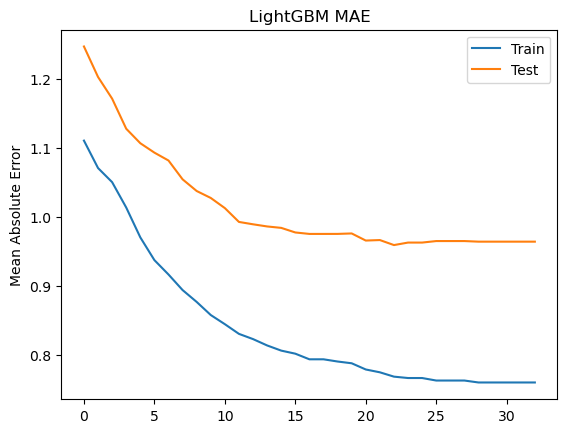

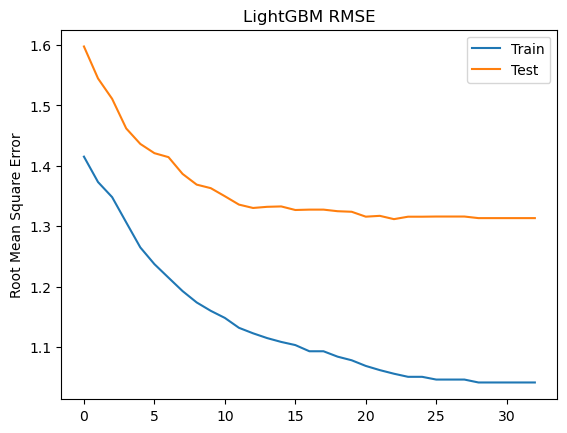

In [32]:
BestMD = LGBMRegressor(colsample_bytree=0.4, learning_rate=0.2, max_depth=1,
              min_split_gain=6, n_estimators=40, num_leaves=21, random_state=7,
              reg_alpha=0.4, reg_lambda=2)
X_train, X_test, y_train, y_test = train_test_split(MD, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestMD.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestMD.predict(X_test)
predictions = [value for value in y_pred]
results = BestMD.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

In [33]:
perm = PermutationImportance(BestMD, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = BestMD.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

In [34]:
from eli5 import show_weights
show_weights(BestMD, importance_type="weight") #“cover” - the average coverage of the feature.

In [35]:
# this might be the best one
show_weights(BestMD, importance_type="split")  #"weight" - how often a feature has been used in making splits

In [36]:
show_weights(BestMD, importance_type="gain")

In [37]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.38
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 122.67
Mean Absolute Error (Σ|y-pred|/n): 0.96
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.32


[1]	training's l1: 1.13451	training's rmse: 1.43835	training's l2: 2.06885	valid_1's l1: 1.28227	valid_1's rmse: 1.63605	valid_1's l2: 2.67666
[2]	training's l1: 1.10415	training's rmse: 1.40582	training's l2: 1.97633	valid_1's l1: 1.25743	valid_1's rmse: 1.60854	valid_1's l2: 2.58739
[3]	training's l1: 1.06935	training's rmse: 1.3672	training's l2: 1.86925	valid_1's l1: 1.2213	valid_1's rmse: 1.5713	valid_1's l2: 2.46899
[4]	training's l1: 1.03875	training's rmse: 1.33357	training's l2: 1.7784	valid_1's l1: 1.189	valid_1's rmse: 1.53797	valid_1's l2: 2.36535
[5]	training's l1: 1.00478	training's rmse: 1.29601	training's l2: 1.67963	valid_1's l1: 1.15957	valid_1's rmse: 1.50356	valid_1's l2: 2.2607
[6]	training's l1: 0.974907	training's rmse: 1.26407	training's l2: 1.59786	valid_1's l1: 1.13855	valid_1's rmse: 1.47764	valid_1's l2: 2.18343
[7]	training's l1: 0.948823	training's rmse: 1.23624	training's l2: 1.52828	valid_1's l1: 1.11712	valid_1's rmse: 1.45424	valid_1's l2: 2.1148
[8]	t

C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


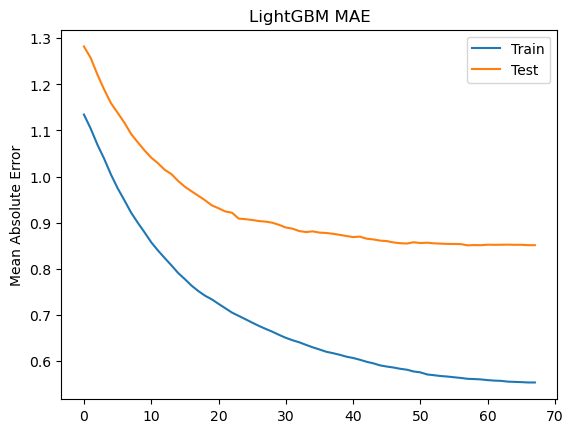

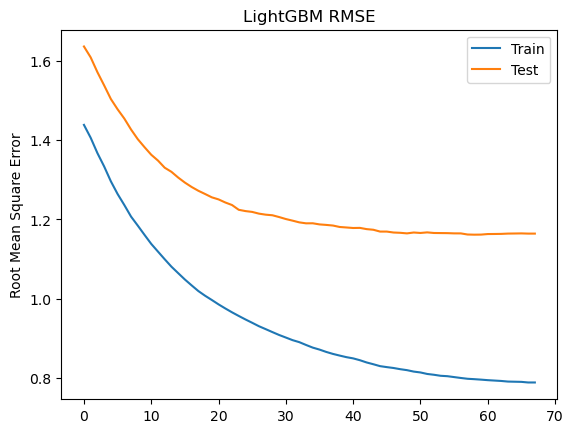

In [38]:
BestSeq = LGBMRegressor(colsample_bytree=0.4, learning_rate=0.07, max_depth=71,
              min_split_gain=1, n_estimators=890, num_leaves=71, random_state=7,
              reg_alpha=0.6, reg_lambda=4)
X_train, X_test, y_train, y_test = train_test_split(Seq, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestSeq.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestSeq.predict(X_test)
predictions = [value for value in y_pred]
results = BestSeq.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

perm = PermutationImportance(BestSeq, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = BestSeq.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

In [39]:
from eli5 import show_weights
show_weights(BestSeq, importance_type="split") #“cover” - the average coverage of the feature.

In [40]:
# this might be the best one
show_weights(BestSeq, importance_type="weight")  #"weight" - how often a feature has been used in making splits

In [41]:
show_weights(BestSeq, importance_type="gain")

In [42]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)


R2 (explained variance): 0.51
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 22.77
Mean Absolute Error (Σ|y-pred|/n): 0.85
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.16


[1]	training's l1: 1.16164	training's rmse: 1.46986	training's l2: 2.16048	valid_1's l1: 1.31205	valid_1's rmse: 1.66544	valid_1's l2: 2.77371
[2]	training's l1: 1.15538	training's rmse: 1.46241	training's l2: 2.13863	valid_1's l1: 1.30531	valid_1's rmse: 1.65821	valid_1's l2: 2.74966
[3]	training's l1: 1.14914	training's rmse: 1.45498	training's l2: 2.11697	valid_1's l1: 1.29864	valid_1's rmse: 1.65098	valid_1's l2: 2.72574
[4]	training's l1: 1.14299	training's rmse: 1.44771	training's l2: 2.09586	valid_1's l1: 1.29202	valid_1's rmse: 1.64395	valid_1's l2: 2.70258
[5]	training's l1: 1.1369	training's rmse: 1.44052	training's l2: 2.07511	valid_1's l1: 1.28546	valid_1's rmse: 1.63702	valid_1's l2: 2.67985
[6]	training's l1: 1.13085	training's rmse: 1.43337	training's l2: 2.05454	valid_1's l1: 1.27895	valid_1's rmse: 1.6301	valid_1's l2: 2.65724
[7]	training's l1: 1.12495	training's rmse: 1.42636	training's l2: 2.0345	valid_1's l1: 1.27251	valid_1's rmse: 1.62338	valid_1's l2: 2.63535
[8

C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


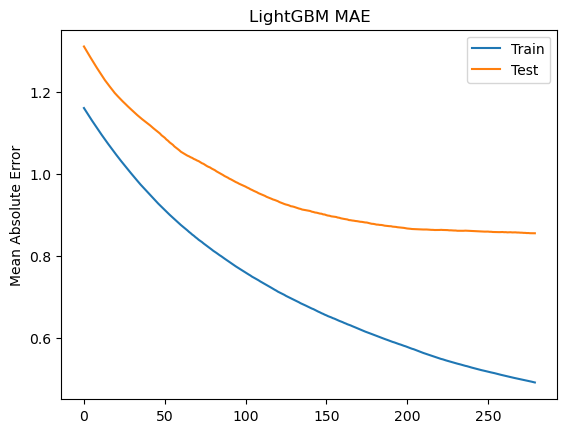

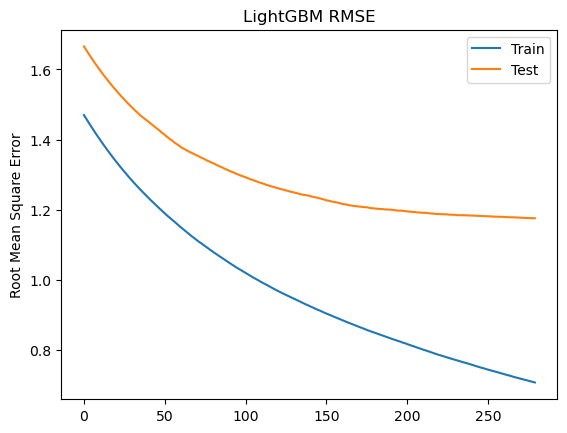

In [43]:
# SEQ_MD

BestSeqMD = LGBMRegressor(colsample_bytree=1, learning_rate=0.01, max_depth=51,
              min_split_gain=0, n_estimators=280, num_leaves=61, random_state=7,
              reg_alpha=0.1, reg_lambda=6)
X_train, X_test, y_train, y_test = train_test_split(Seq_MD, Y, test_size=0.2, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
BestSeqMD.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = BestSeqMD.predict(X_test)
predictions = [value for value in y_pred]
results = BestSeqMD.evals_result_
epoch = len(results['training']['l1'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['l1'], label='Train')
ax.plot(x_axis, results['valid_1']['l1'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('LightGBM MAE')
pyplot.savefig('LightGBM_MAE_tuned.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('LightGBM RMSE')
pyplot.savefig('LightGBM_RMSE_tuned.png')
pyplot.show()

perm = PermutationImportance(BestSeqMD, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# booster = BestSeqMD.get_booster()
# original_feature_names = booster.feature_names
# print(booster.get_dump()[0])
# booster.feature_names = original_feature_names

In [44]:
from eli5 import show_weights
show_weights(BestSeqMD, importance_type="split") #“cover” - the average coverage of the feature.

In [45]:
# this might be the best one
show_weights(BestSeqMD, importance_type="weight")  #"weight" - how often a feature has been used in making splits

In [46]:
show_weights(BestSeqMD, importance_type="gain")

In [47]:
from sklearn import metrics
## Kpi
predictions = [value for value in y_pred]
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.5
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 3.33
Mean Absolute Error (Σ|y-pred|/n): 0.86
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.18


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

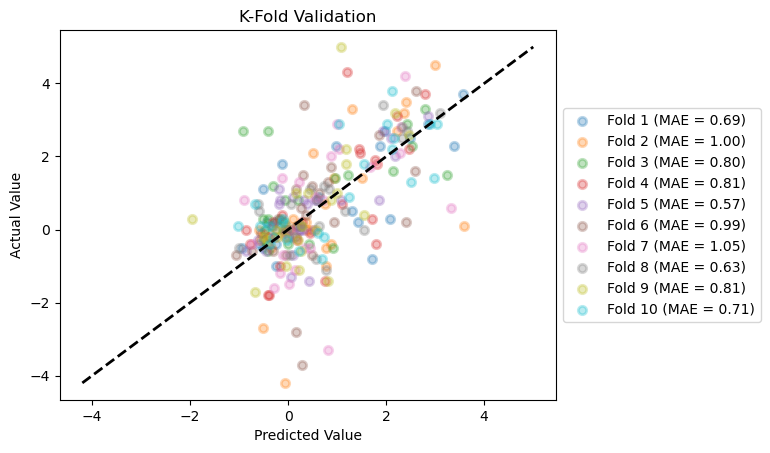

In [48]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

scores = []
cv = KFold(n_splits=10, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train.iloc[train],
                 y_train.iloc[train]).predict(X_train.iloc[test])
    true = y_train.iloc[test]
    score = mean_absolute_error(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3,
                label='Fold %d (MAE = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('K-Fold Validation')
plt.legend(prop={"size":10}, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [49]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test.iloc[max_idx], y_pred[max_idx]
print("Max Error:", "{:,.2f}".format(max_error))

Max Error: -3.90


In [50]:
print(y_test.iloc[20] - y_pred[20])

-3.9004747120586947


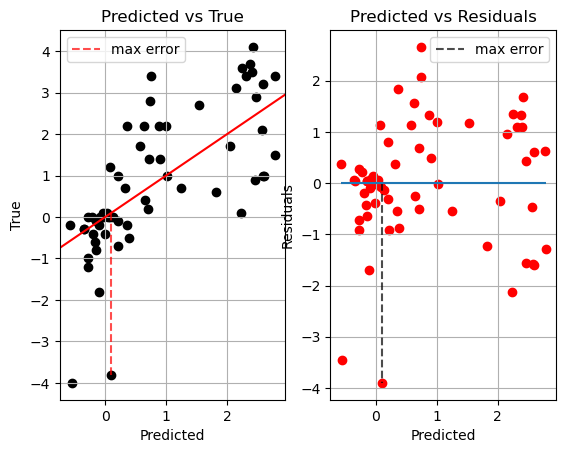

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()

## Plot predicted vs residuals
ax[1].scatter(y_pred, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred))
ax[1].legend()

plt.show()

C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


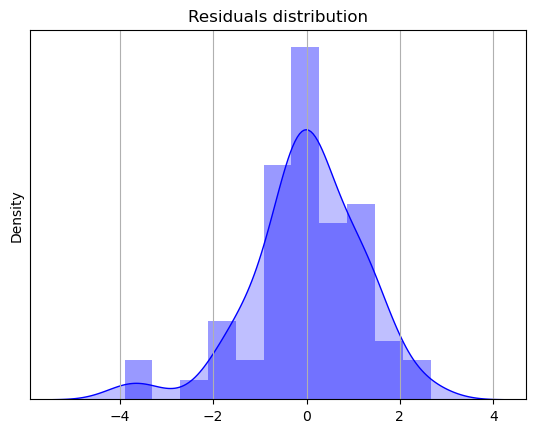

In [52]:
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(residuals, color="blue", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.savefig("Residues_dist.png", dpi=350)
plt.show()

In [53]:
import shap

In [54]:
shap_values = shap.Explainer(BestSeqMD).shap_values(X_train)

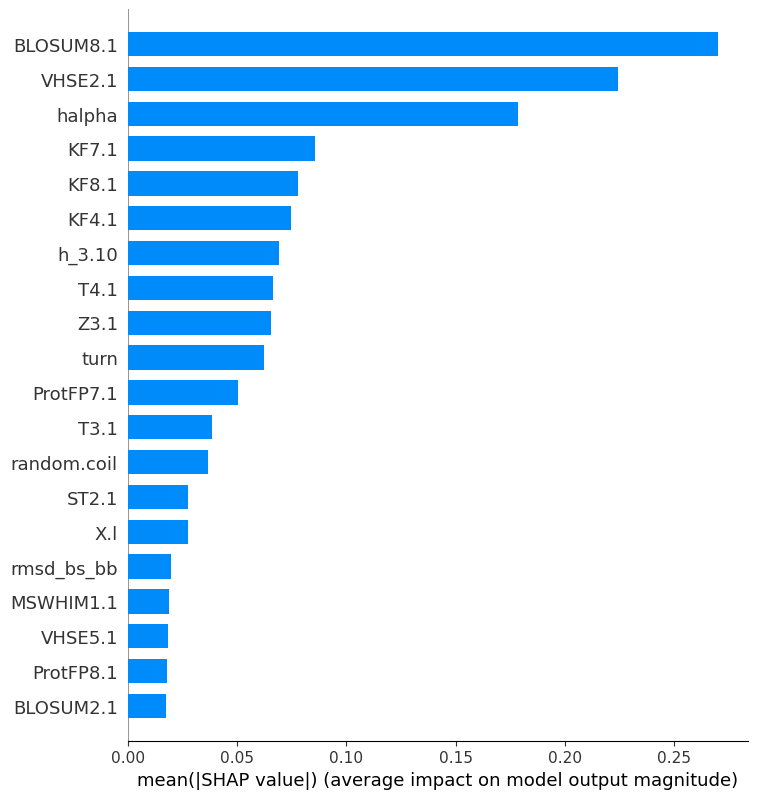

In [68]:
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.savefig("SHAP_importance.png", dpi=1200, bbox_inches = "tight")
plt.show()

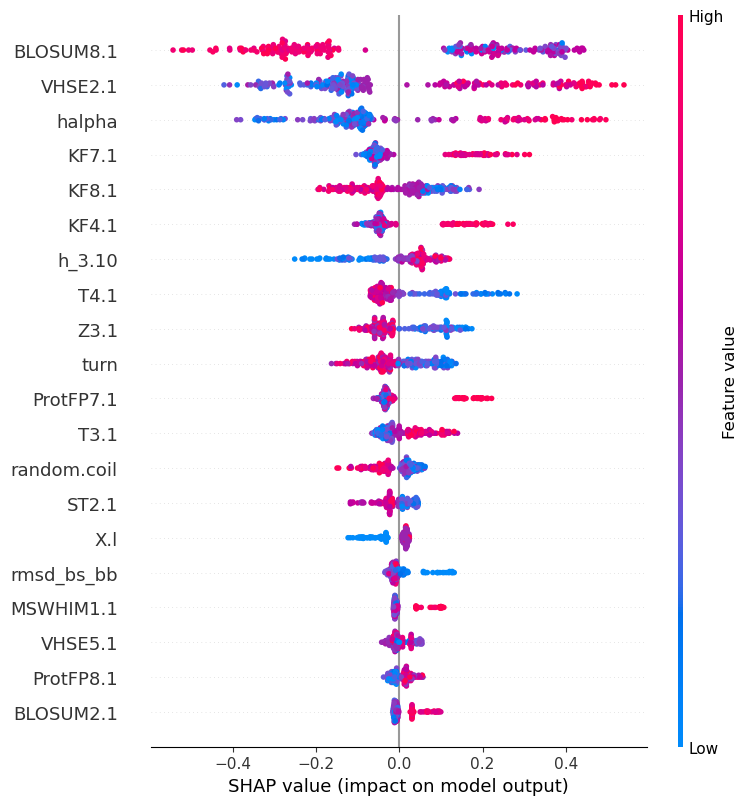

In [56]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

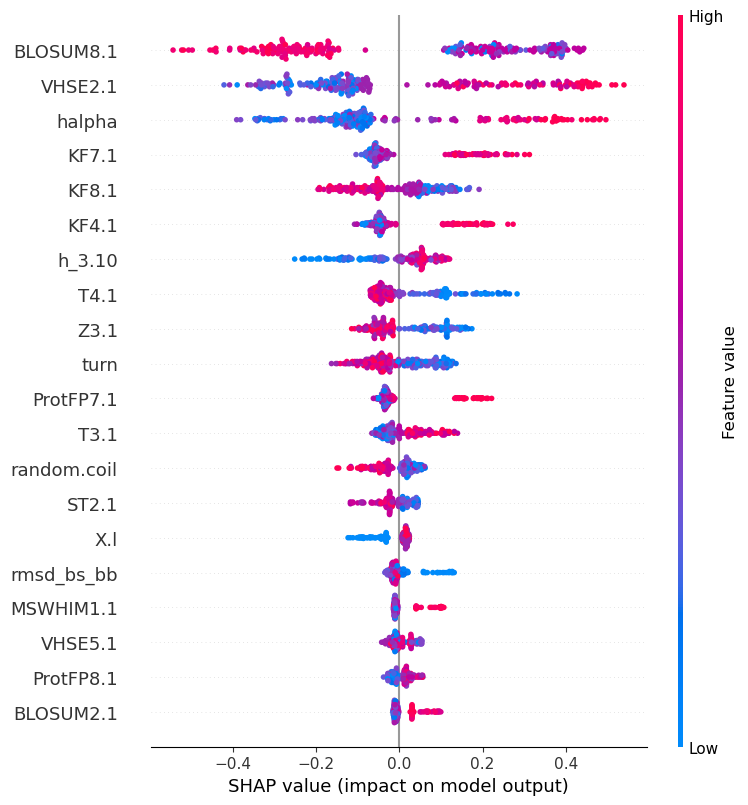

In [57]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

[1]	training's l1: 0.917122	training's rmse: 1.23176	training's l2: 1.51724	valid_1's l1: 1.05536	valid_1's rmse: 1.40082	valid_1's l2: 1.9623
[2]	training's l1: 0.849522	training's rmse: 1.16157	training's l2: 1.34925	valid_1's l1: 0.975068	valid_1's rmse: 1.31356	valid_1's l2: 1.72545
[3]	training's l1: 0.817345	training's rmse: 1.12756	training's l2: 1.27139	valid_1's l1: 0.953847	valid_1's rmse: 1.28163	valid_1's l2: 1.64259
[4]	training's l1: 0.817345	training's rmse: 1.12756	training's l2: 1.27139	valid_1's l1: 0.953847	valid_1's rmse: 1.28163	valid_1's l2: 1.64259
[5]	training's l1: 0.817345	training's rmse: 1.12756	training's l2: 1.27139	valid_1's l1: 0.953847	valid_1's rmse: 1.28163	valid_1's l2: 1.64259
[6]	training's l1: 0.817345	training's rmse: 1.12756	training's l2: 1.27139	valid_1's l1: 0.953847	valid_1's rmse: 1.28163	valid_1's l2: 1.64259
[7]	training's l1: 0.817345	training's rmse: 1.12756	training's l2: 1.27139	valid_1's l1: 0.953847	valid_1's rmse: 1.28163	valid_1's

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


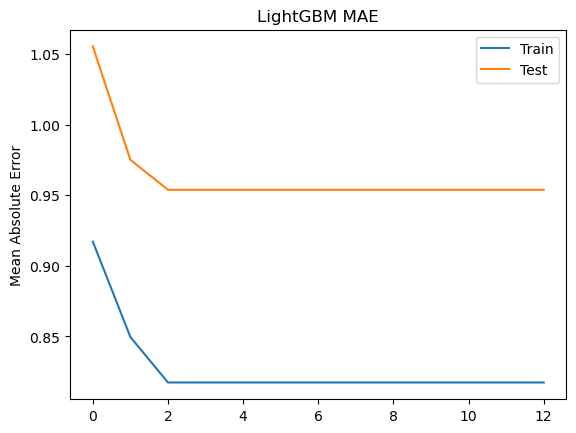

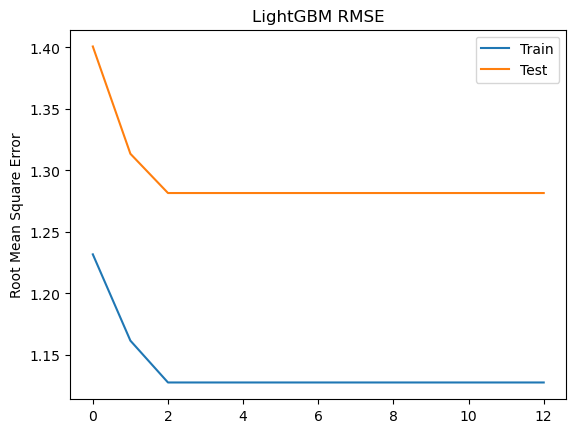

In [58]:
# BestMDMDpocket = LGBMRegressor(colsample_bytree=1, learning_rate=0.6, max_depth=81,
#               min_split_gain=19, n_estimators=350, num_leaves=81,
#               random_state=7, reg_alpha=1, reg_lambda=5)
# X_train, X_test, y_train, y_test = train_test_split(MD_MDpocket, Y, test_size=0.2, random_state=seed)
# eval_set = [(X_train, y_train), (X_test, y_test)]
# BestMDMDpocket.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
# y_pred = BestMDMDpocket.predict(X_test)
# predictions = [value for value in y_pred]
# results = BestMDMDpocket.evals_result_
# epoch = len(results['training']['l1'])
# x_axis = range(0, epoch)
# # plot log loss
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['l1'], label='Train')
# ax.plot(x_axis, results['valid_1']['l1'], label='Test')
# ax.legend()
# pyplot.ylabel('Mean Absolute Error')
# pyplot.title('LightGBM MAE')
# pyplot.savefig('LightGBM_MAE_tuned.png')
# pyplot.show()
# # plot classification error
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['rmse'], label='Train')
# ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
# ax.legend()
# pyplot.ylabel('Root Mean Square Error')
# pyplot.title('LightGBM RMSE')
# pyplot.savefig('LightGBM_RMSE_tuned.png')
# pyplot.show()

In [59]:
# from sklearn import metrics
# ## Kpi
# print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
# print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
# print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
# print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
# ## residuals
# residuals = []
# for i, c in zip(y_test, y_pred):
#     residuals.append(i - c)

R2 (explained variance): 0.41
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 23.5
Mean Absolute Error (Σ|y-pred|/n): 0.95
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.28


In [60]:
# show_weights(BestMDMDpocket, importance_type="gain")
#

In [61]:
# show_weights(BestMDMDpocket, importance_type="split")
#

In [69]:
# show_weights(BestSeqMDpocket, importance_type="gain")
#

In [ ]:
# show_weights(BestSeqMDpocket, importance_type="split")
#

In [ ]:
# BestSeqMDpocket = LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, max_depth=11,
#               min_split_gain=5, n_estimators=530, num_leaves=91, random_state=7,
#               reg_alpha=0.2, reg_lambda=8)
#
# X_train, X_test, y_train, y_test = train_test_split(Seq_MDpocket, Y, test_size=0.2, random_state=seed)
# eval_set = [(X_train, y_train), (X_test, y_test)]
# BestSeqMDpocket.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
# y_pred = BestSeqMDpocket.predict(X_test)
# predictions = [value for value in y_pred]
# results = BestMDMDpocket.evals_result_
# epoch = len(results['training']['l1'])
# x_axis = range(0, epoch)
# # plot log loss
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['l1'], label='Train')
# ax.plot(x_axis, results['valid_1']['l1'], label='Test')
# ax.legend()
# pyplot.ylabel('Mean Absolute Error')
# pyplot.title('LightGBM MAE')
# pyplot.savefig('LightGBM_MAE_tuned.png')
# pyplot.show()
# # plot classification error
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['training']['rmse'], label='Train')
# ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
# ax.legend()
# pyplot.ylabel('Root Mean Square Error')
# pyplot.title('LightGBM RMSE')
# pyplot.savefig('LightGBM_RMSE_tuned.png')
# pyplot.show()
# from sklearn import metrics
# ## Kpi
# print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
# print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
# print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
# print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
# ## residuals
# residuals = []
# for i, c in zip(y_test, y_pred):
#     residuals.append(i - c)

In [ ]:
#### LAZY COMPARISON ####
# from lazypredict.Supervised import LazyRegressor
# from sklearn.model_selection import train_test_split
# #
# models_lazy = []
# datasets = [MDPocket, MD, Seq, Seq_MD, MD_MDpocket, Seq_MDpocket]
# for dataset in datasets:
#     X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.2, random_state=seed)
#     reg = LazyRegressor(predictions=True)
#     models, predictions = reg.fit(X_train, X_test, y_train, y_test)
#     models_lazy.append(models)

In [ ]:
#fit all models



In [ ]:
models_lazy[5]

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance
# X_train, X_test, y_train, y_test = train_test_split(Seq, Y, test_size=0.2, random_state=seed)
#
# perm = PermutationImportance(BestSeq, random_state=1).fit(X_test, y_test)
# eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
# import shap  # package used to calculate Shap values
#
# explainer = shap.TreeExplainer(Best_estimator)
# shap_values = explainer.shap_values(X)

In [ ]:
# shap.summary_plot(shap_values, X)

In [ ]:
# shap.summary_plot(shap_values, X)

In [ ]:
shap.dependence_plot('VHSE2.1', shap_values, X, dot_size=32)

In [ ]:
shap.dependence_plot('halpha', shap_values, X, dot_size=32)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(Seq_MD, Y, test_size=0.2, random_state=seed)
explainer = shap.Explainer(BestSeqMD)
shap_values = explainer(Seq_MD)
shap_values_test = explainer(X_test)
shap_values_train = explainer(X_train)

In [92]:
for colu in Seq_MD:
    shap.dependence_plot(colu, shap_values, Seq_MD, dot_size=32)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [77]:
corr_matrix = pd.DataFrame(shap_values.values,columns=Seq_MD.columns).corr()
# change this value as needed, if 0.5 does not work for your scenario


In [78]:
# Display Correlations
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#plt.savefig('shap_correlation.png',dpi=300,bbox_inches='tight')

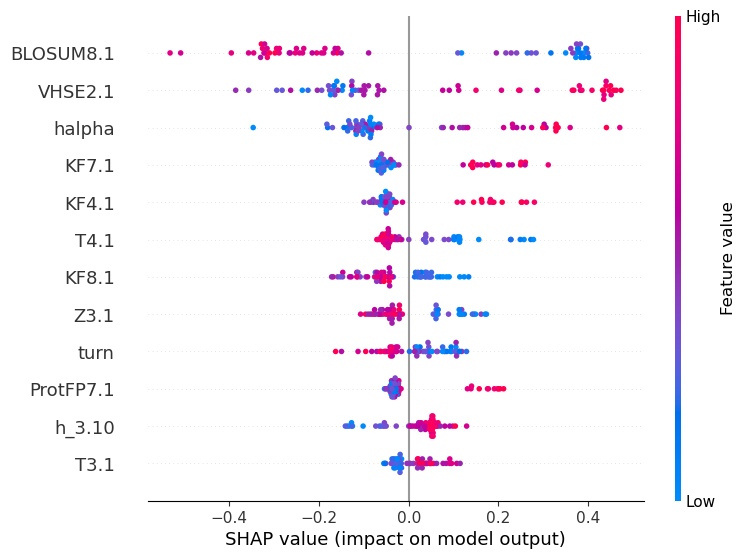

In [80]:
shap.summary_plot(shap_values_test, X_test, max_display=12)
# plt.savefig("my_importance_plot.pdf", dpi=300, bbox_inches='tight')
# plt.show()

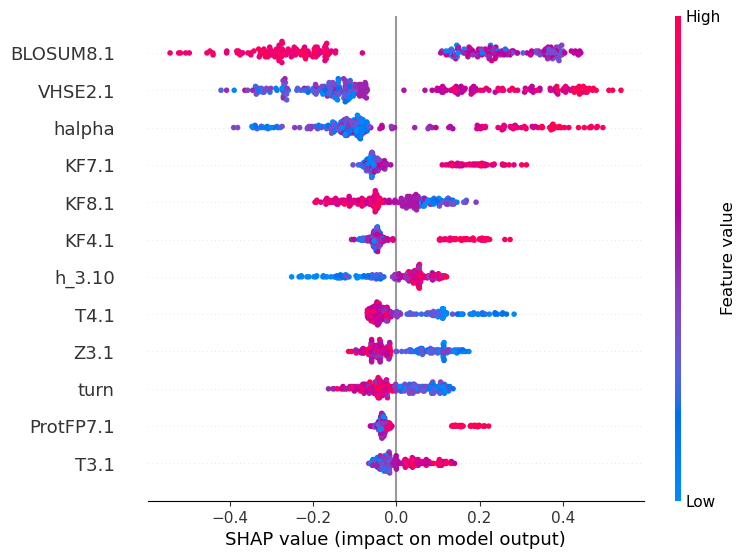

In [81]:
shap.summary_plot(shap_values_train, X_train, max_display=12)

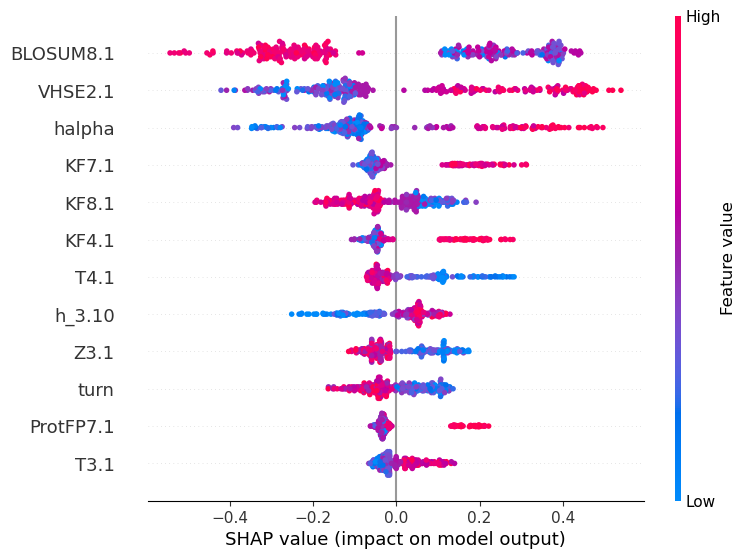

In [83]:
shap.summary_plot(shap_values, Seq_MD, max_display=12, show=False)
# shap.plots.heatmap(shap_values)
plt.savefig("my_heatmap_SeqMD.png", dpi=1200, bbox_inches='tight')
plt.show()
# # plt.show()

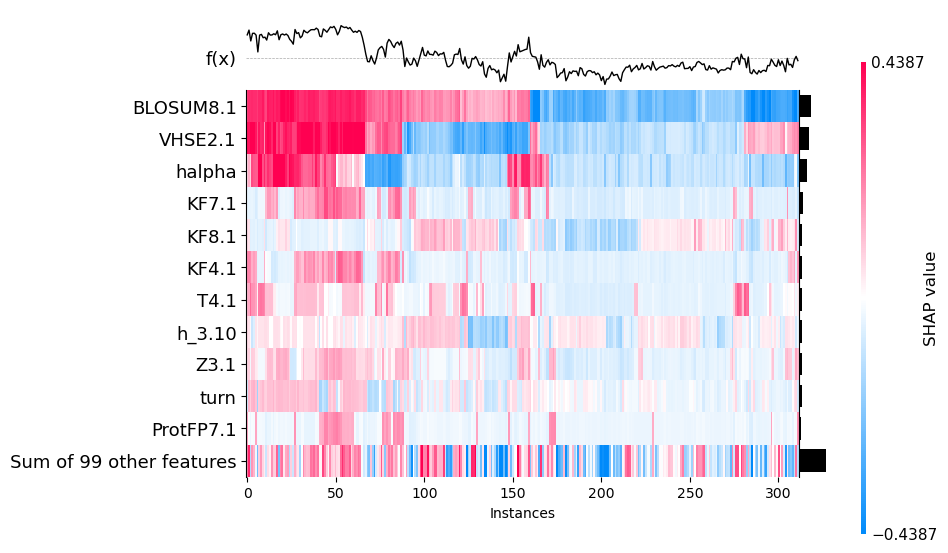

In [87]:
shap.plots.heatmap(shap_values, max_display=12, show=False)
plt.savefig("my_features_heatmap_SeqMD.png", dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
# if you want to save the above
# shap.plots.beeswarm(shap_values, max_display=12, show=False)
# plt.title("")
# plt.ylabel("")
# plt.savefig("my_beeswarm_plot.tiff", dpi=350, bbox_inches='tight') # we can save a PDF of the figure if we want
# plt.show()

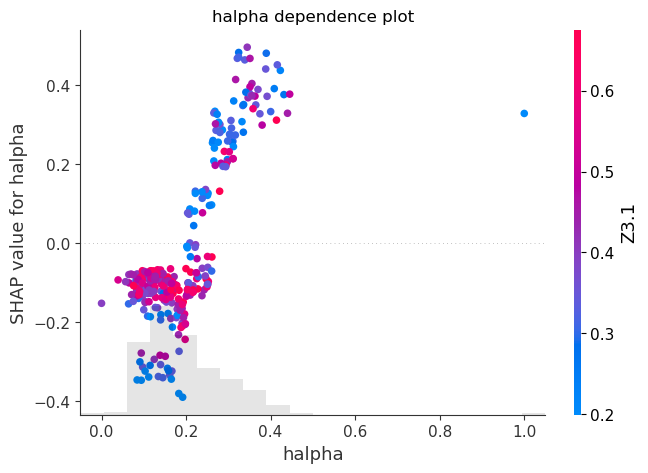

In [88]:
# shap.plots.scatter(shap_values[:,"halpha"], show=False, dot_size=30, color=shap_values)
# plt.title("halpha dependence plot")
# plt.ylabel("SHAP value for halpha")
# plt.savefig("my_dependence_plot_halpha_high_res.tiff", dpi=350) # we can save a PDF of the figure if we want
# plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
#
# explainer = shap.Explainer(Best_estimator)
# shap_values_X_test = explainer(X_test)


In [ ]:
# shap_interaction = explainer.shap_interaction_values(X_test)
#

In [ ]:
# shap.summary_plot(shap_interaction, X_test)

In [ ]:
# mean_shap = np.abs(shap_interaction).mean(0)
# df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)
#
# # times off diagonal by 2
# df.where(df.values == np.diagonal(df),df.values*2,inplace=True)
#
# # display
# plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)
# sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
# plt.yticks(rotation=0)


In [ ]:
# shap.plots.heatmap(shap_values, max_display=12, show=False)
# plt.title("")
# plt.ylabel("")
# plt.savefig("Light_heatmap_plot.tiff", dpi=350, bbox_inches="tight")
# plt.show()

In [ ]:
# fitting GAMMA and POISSON as they were missed out
# from sklearn.linear_model import PoissonRegressor
# model = PoissonRegressor()
# y_poiss =
# model.fit(X_train, y_train)
# ERROR: Some value(s) of y are out of the valid range for family PoissonDistribution and GammaDistribution

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(Y)
shapiro_test

In [ ]:
# from scipy import stats
# import pylab
# stats.probplot(Y, dist="norm", plot=pylab)
# pylab.show()
import pingouin as pg
ax = pg.qqplot(Y, dist="norm")

ModuleNotFoundError: No module named 'pingouin'

In [ ]:
# from scipy.stats import skew, kurtosis
# skew(Y, bias=False)
#

In [ ]:
# kurtosis(Y, bias=False)

C:\Users\Nick\miniconda3\envs\torch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



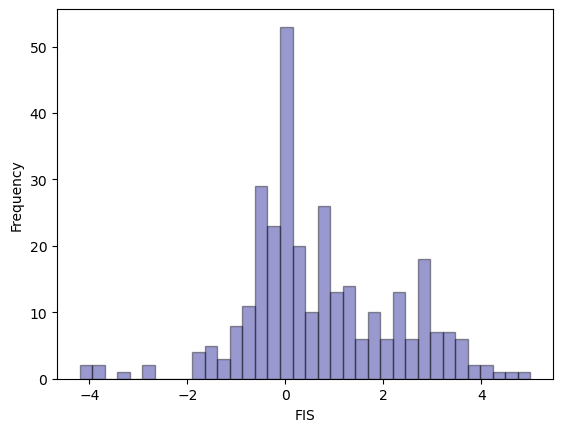

In [146]:
ax = sns.distplot(Y, hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='FIS', ylabel='Frequency')
plt.savefig("HIST_Y.png", dpi=1200)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# shap_values
# f = plt.figure()
# shap.summary_plot(shap_values, X_train)

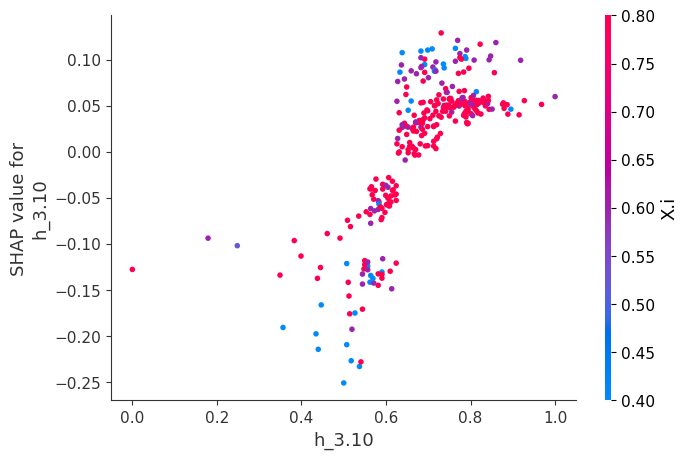

In [102]:
explainer = shap.TreeExplainer(BestSeqMD)
shap_values = explainer.shap_values(Seq_MD)
shap.dependence_plot("h_3.10", shap_values, Seq_MD)

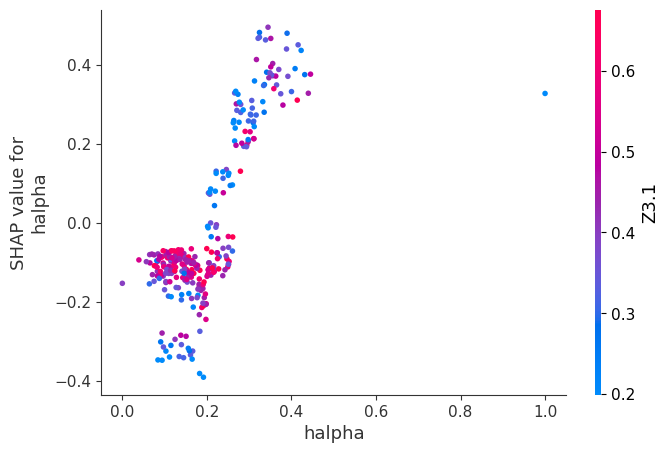

In [103]:
shap.dependence_plot("halpha", shap_values, Seq_MD)

In [104]:
shap.dependence_plot("", shap_values, Seq_MD)

ValueError: Could not find feature named: b_sheet

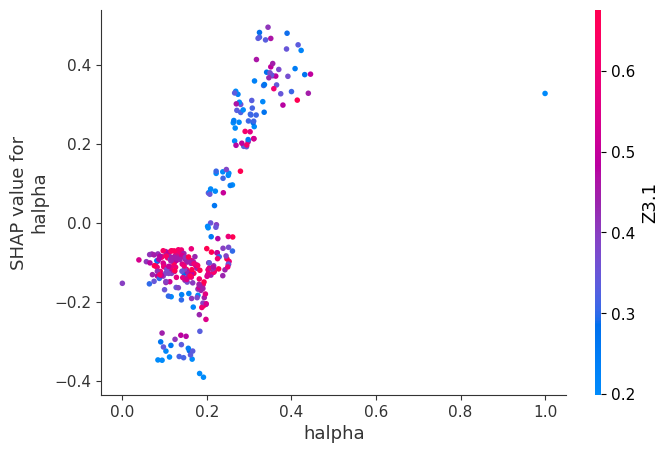

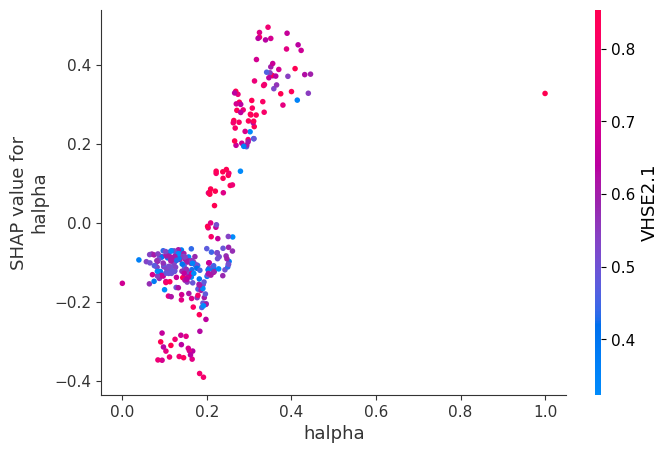

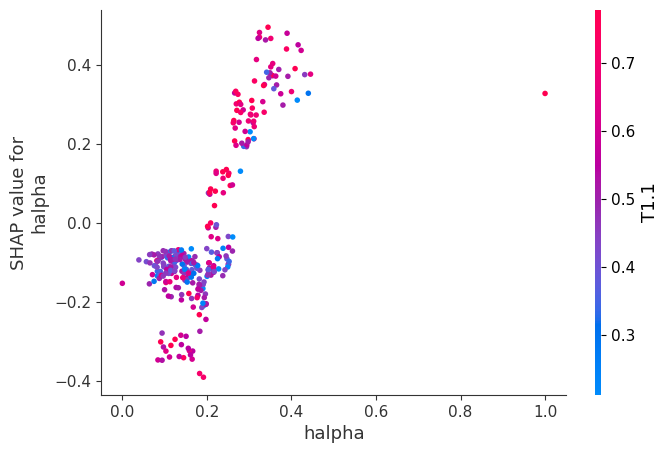

In [106]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions("halpha", shap_values, Seq_MD)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("halpha", shap_values, Seq_MD, interaction_index=inds[i])

In [114]:
X.columns.get_loc("o")

79

In [117]:
X.columns.get_loc("random.coil")

111

In [120]:
X.columns.get_loc("pock_volume")

0

In [127]:
len(X.columns)

190

In [129]:
# 80 32
# 32 79 66

pock_volume
pock_volume_st
pock_asa
pock_asa_st
pock_pol_asa
pock_pol_asa_st
pock_apol_asa
pock_apol_asa_st
pock_asa22
pock_asa22_st
pock_pol_asa22
pock_pol_asa22_st
pock_apol_asa22
pock_apol_asa22_st
nb_as
nb_as_st
mean_as_ray
mean_as_ray_st
mean_as_solv_acc
mean_as_solv_acc_st
apol_as_prop
apol_as_prop_st
mean_loc_hyd_dens
mean_loc_hyb_dens_st
hydrophobicity_score
hydrophobicity_score_st
volume_score
volume_score_st
polarity_score
polarity_score_st
charge_score
charge_score_st
prop_polar_atm
prop_polar_atm_st
as_max_dst
as_max_dst_st
convex_hull_volume
convex_hull_volume_st
nb_abpa
nb_abpa_st
ala
ala_st
arg
arg_st
asn
asn_st
asp
asp_st
cys
cys_st
gln
gln_st
glu
glu_st
gly
gly_st
his
his_st
ile
ile_st
leu
leu_st
lys
lys_st
met
met_st
phe
phe_st
pro
pro_st
ser
ser_st
thr
thr_st
trp
trp_st
tyr
tyr_st
val
val_st
rog_pro_noh
rog_pro_noh_sd
rog_pro_bb
rog_pro_bb_sd
rog_pro_ca
rog_pro_ca_sd
rog_bs_noh
rog_bs_noh_sd
rog_bs_bb
rog_bs_bb_sd
rog_bs_ca
rog_bs_ca_sd
rmsd_pro_noh
rmsd_pro_noh_sd
r

In [132]:
Y
import plotly.express as px
df = px.data.tips()
fig = px.histogram(Y)
fig.show()

In [148]:
X.var()

pock_volume                0.081380
pock_volume_st             0.027112
pock_asa                   0.070045
pock_asa_st                0.025409
pock_pol_asa               0.071223
pock_pol_asa_st            0.025024
pock_apol_asa              0.071417
pock_apol_asa_st           0.028748
pock_asa22                 0.079020
pock_asa22_st              0.023460
pock_pol_asa22             0.074943
pock_pol_asa22_st          0.024305
pock_apol_asa22            0.072462
pock_apol_asa22_st         0.031762
nb_as                      0.065906
nb_as_st                   0.057771
mean_as_ray                0.097696
mean_as_ray_st             0.103007
mean_as_solv_acc           0.087210
mean_as_solv_acc_st        0.101826
apol_as_prop               0.031236
apol_as_prop_st            0.057834
mean_loc_hyd_dens          0.039097
mean_loc_hyb_dens_st       0.041883
hydrophobicity_score       0.048848
hydrophobicity_score_st    0.056469
volume_score               0.073928
volume_score_st            0